<a href="https://colab.research.google.com/github/10udCryp7/Speech-Practice/blob/main/notebooks/01_Working_with_audio_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U datasets

# Load dataset

In [68]:
from datasets import load_dataset

dataset = load_dataset('hf-internal-testing/librispeech_asr_dummy', split = 'validation')

README.md:   0%|          | 0.00/520 [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/9.19M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/73 [00:00<?, ? examples/s]

# Get Waveform

In [77]:
# get array of waveform
sample_array = dataset[0]['audio']['array']
print(f'array: {sample_array}')

# get tensor of waveform
sample_tensor = dataset[0]['audio'].get_all_samples().data
print(f'tensor: {sample_tensor}')

array: [0.00238037 0.0020752  0.00198364 ... 0.00042725 0.00057983 0.0010376 ]
tensor: tensor([[0.0024, 0.0021, 0.0020,  ..., 0.0004, 0.0006, 0.0010]])


In [ ]:
import gradio as gr

with gr.Blocks() as demo:
  audio = dataset[0]['audio']['sampling_rate'], sample_array
  output = gr.Audio(audio, 'test')

demo.launch(debug = True)


#Visualize Waveform

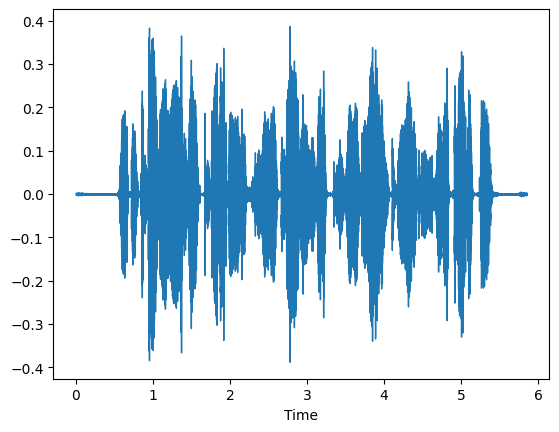

In [86]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

array = sample_array
sr = dataset[0]['audio']['sampling_rate']

plt.figure(12)
librosa.display.waveshow(array, sr=sr)

#Resampling with cast_column

In [88]:
from datasets import Audio

dataset_32k = dataset.cast_column('audio', Audio(sampling_rate = 32000))

dataset_32k.features['audio']

Audio(sampling_rate=32000, decode=True, stream_index=None)